In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from xgboost import plot_importance

In [20]:
transactions = pd.read_csv('transaction_dataset.csv', index_col = 0)
transactions.drop(columns = 'Index', inplace = True)
transactions.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [21]:
transactions.dtypes

Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                                            float64
max val sent                                            float64
avg val sent                            

In [22]:
transactions.columns = transactions.columns.str.lstrip()

In [23]:
# Remove non-numerical categories
transactions.drop(columns = ['Address', 'ERC20 most sent token type', 'ERC20_most_rec_token_type'], inplace = True)

In [24]:
transactions.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0


In [31]:
# Number of normal (non-fraudulent) transactions
len(transactions[transactions['FLAG'] == 0])

7662

In [32]:
# Number of fraudulent transactions
len(transactions[transactions['FLAG'] == 1])

2179

(46.0, 0.0)

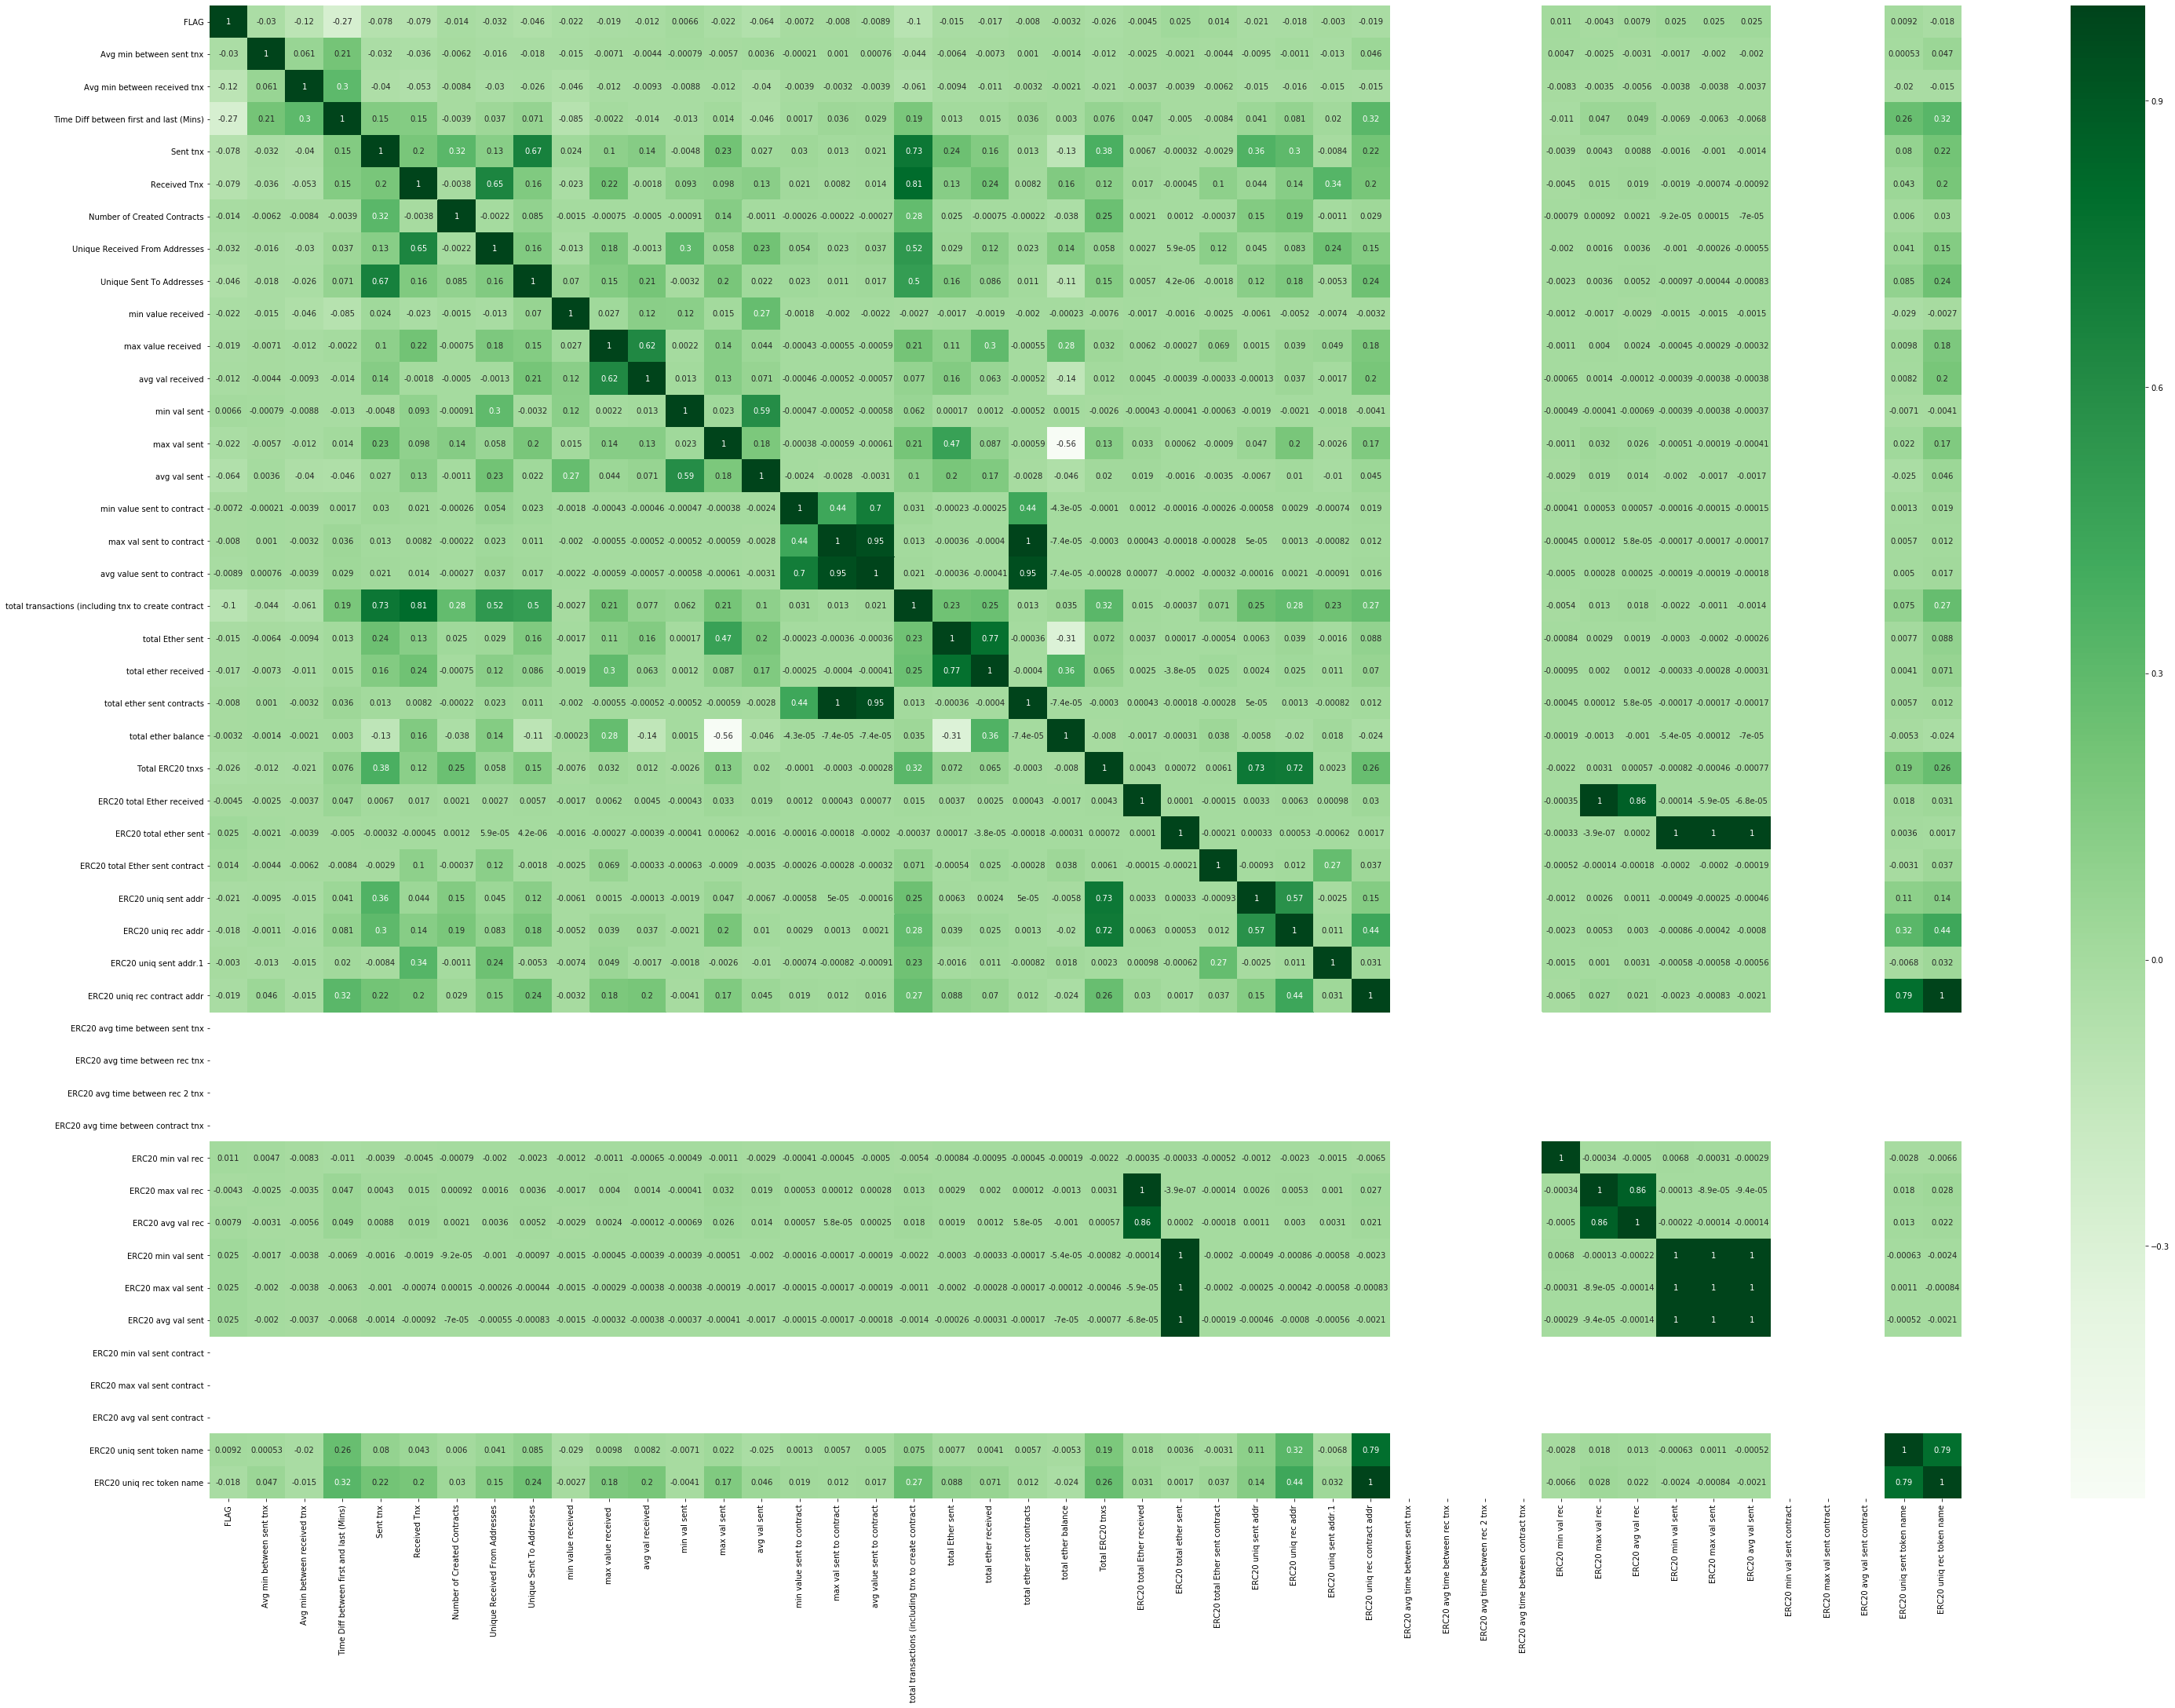

In [38]:
plt.figure(figsize=(50,35))
ax = sns.heatmap(transactions.corr(), annot=True, cmap='Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [39]:
# Remove categories containing only zeros
transactions.drop(columns = ['ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx',
                            'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx',
                            'ERC20 min val sent contract', 'ERC20 max val sent contract',
                            'ERC20 avg val sent contract'], inplace = True)

(39.0, 0.0)

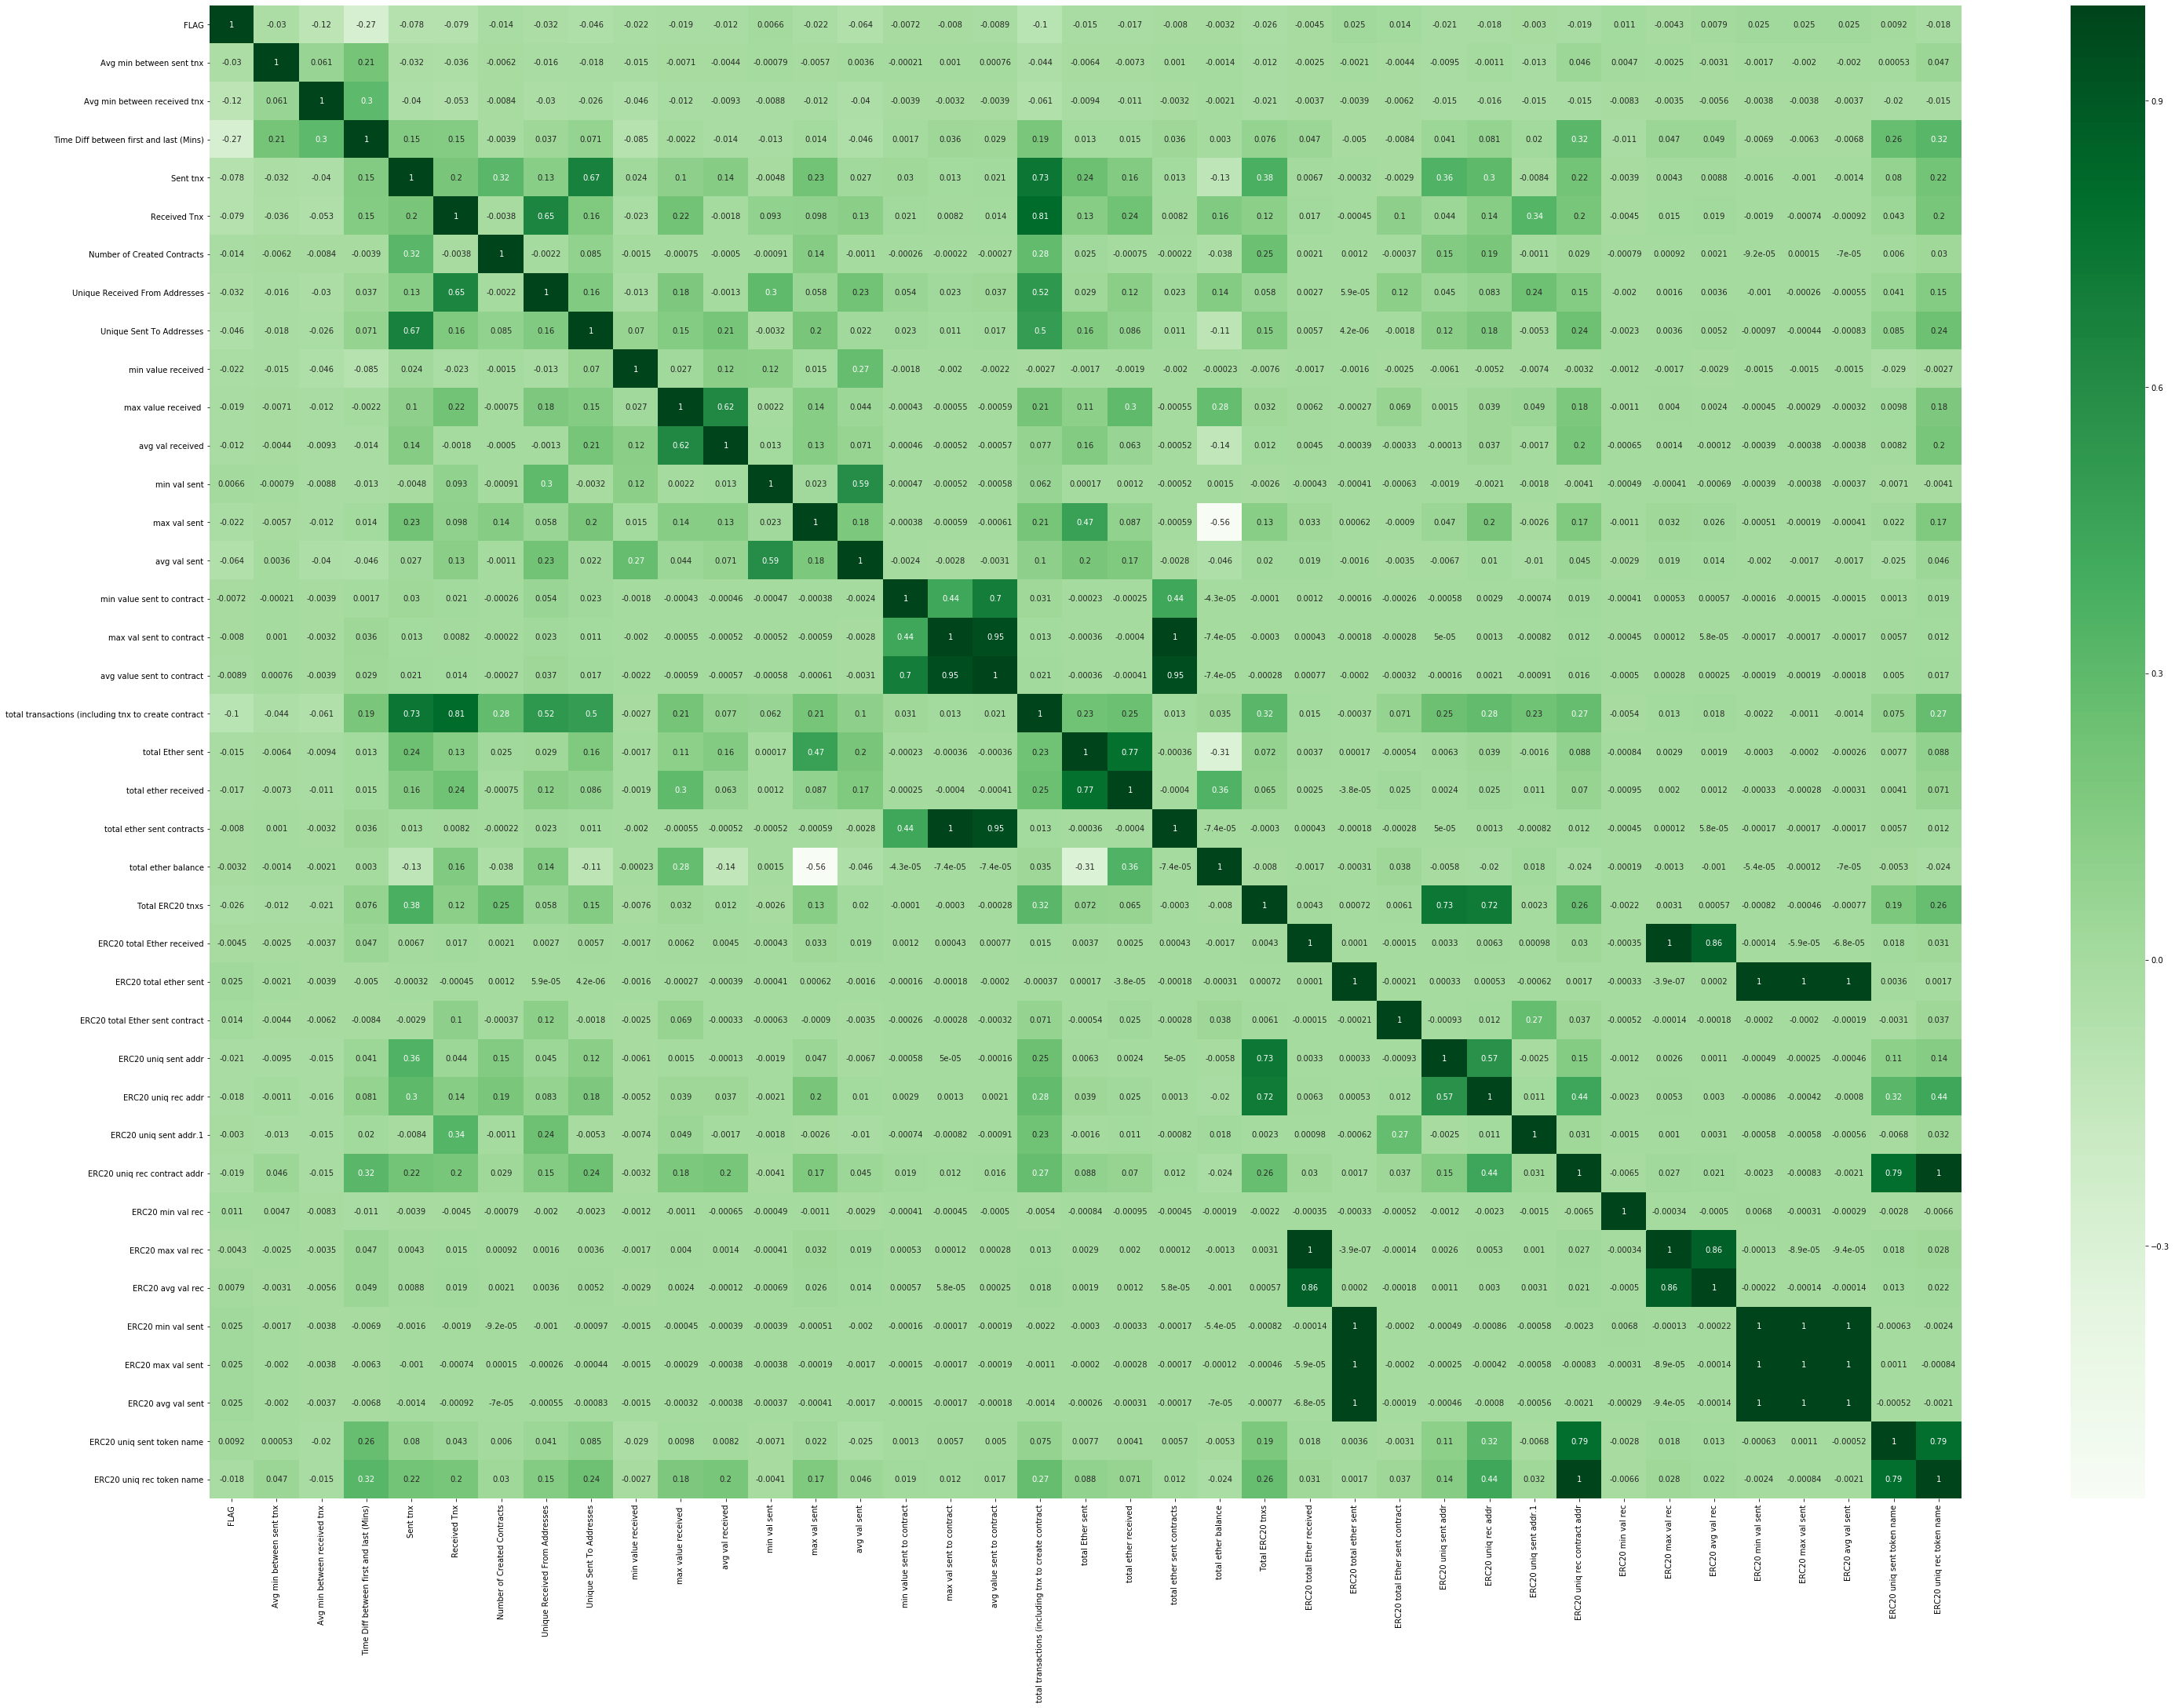

In [40]:
plt.figure(figsize=(50,35))
ax = sns.heatmap(transactions.corr(), annot=True, cmap='Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [53]:
# Imput NaN values with average of each numerical column
transactions = transactions.fillna(transactions.mean())

In [55]:
transactions.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs',
       'ERC20 total Ether received', 'ERC20 total ether sent',
       'ERC20 total Ether sent contract', 'ERC20 uniq sent addr',
       'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1',
       'ERC20 uniq rec contract addr', 'ERC20 min val rec',
       'ERC20 max val rec', 'ERC20 avg val rec', 'ERC20 min val sent',
       '

In [56]:
y = transactions['FLAG']
x = transactions[['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs',
       'ERC20 total Ether received', 'ERC20 total ether sent',
       'ERC20 total Ether sent contract', 'ERC20 uniq sent addr',
       'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1',
       'ERC20 uniq rec contract addr', 'ERC20 min val rec',
       'ERC20 max val rec', 'ERC20 avg val rec', 'ERC20 min val sent',
       'ERC20 max val sent', 'ERC20 avg val sent',
       'ERC20 uniq sent token name', 'ERC20 uniq rec token name']]
X = pd.DataFrame(x, columns = x.columns)

In [57]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Due to class imbalance, synthesize fake data for the minority class (legendary) using SMOTE
smote = SMOTE(sampling_strategy='minority')
X_synth, y_synth = smote.fit_sample(X_train, y_train)

In [61]:
# Create list of different classifiers/models you want to run
classifiers = []

model1 = xgboost.XGBClassifier()
classifiers.append(model1)

model2 = tree.DecisionTreeClassifier()
classifiers.append(model2)

model3 = RandomForestClassifier()
classifiers.append(model3)

In [62]:
for clf in classifiers:
    clf.fit(X_synth, y_synth)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    print("Precision of %s is %s"%(clf, prec))
    print("Recall of %s is %s"%(clf, recall))
    print("F1 Score of %s is %s"%(clf, f1))
    print("")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("")
    print(classification_report(y_test, y_pred))
    print("")
    print("")

Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) is 0.9766378872524124
Precision of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) is 0.93592677

In [64]:
# Random Forest performed the best
mean_rf_cv_score = np.mean(cross_val_score(model3, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

<IPython.core.display.Javascript object>

Mean Cross Validation Score for Random Forest Classifier: 98.15%


In [106]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['entropy'],
    'max_depth': [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 3]
}

In [107]:
rf_grid_search = GridSearchCV(model3, rf_param_grid, cv=3)
rf_grid_search.fit(X_synth, y_synth)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 98.57%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [108]:
rf_grid_predictions = rf_grid_search.predict(X_test)

In [109]:
print(confusion_matrix(y_test, rf_grid_predictions))
print(classification_report(y_test, rf_grid_predictions))

[[1528   14]
 [  19  408]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1542
           1       0.97      0.96      0.96       427

    accuracy                           0.98      1969
   macro avg       0.98      0.97      0.98      1969
weighted avg       0.98      0.98      0.98      1969



In [112]:
def plot_feature_importances(model):
    n_features = X_synth.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_synth.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

<IPython.core.display.Javascript object>

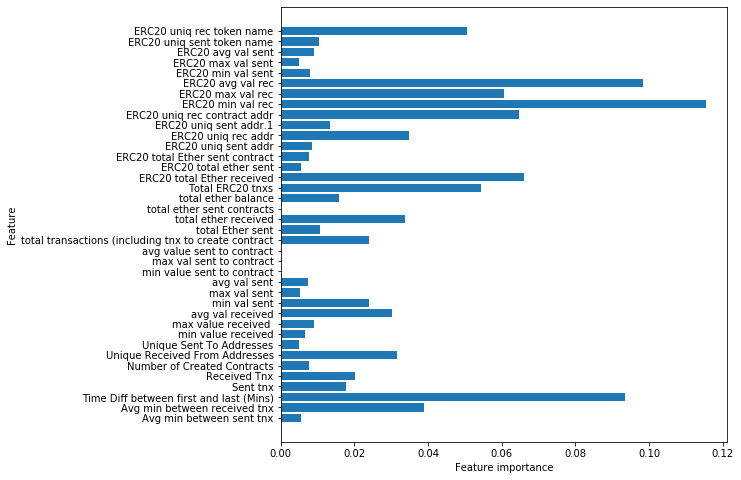

In [113]:
plot_feature_importances(model3)